The data is formatted as JSON separated by newline. Using pandas to read dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_json("./Software_5.json", lines=True)


Exploratory data analysis on overall rating column

In [2]:
dataframe["overall"].describe()


count    12805.000000
mean         3.877860
std          1.362086
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

Plotting pie chart and bar chart for overall score distribution. The 'overall' column has 5 labels: 1.0, 2.0, 3.0, 4.0, 5.0 where 1.0 is very bad, 3.0 is neutral and 5.0 is very good.

As can be seen, we have unbalanced data here with over 40% of reviews are very good, while only 11.7% of review is very bad

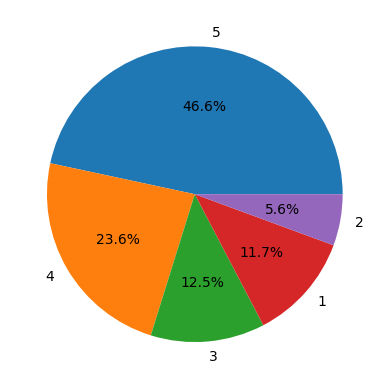

<AxesSubplot: >

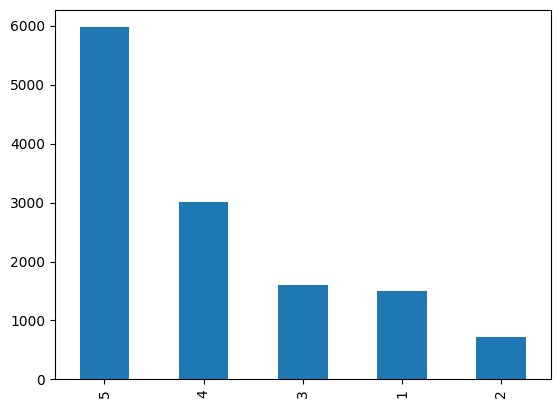

In [3]:
scores = dataframe["overall"].value_counts()
plt.pie(scores, labels=scores.index, autopct='%1.1f%%')
plt.show()

dataframe['overall'].value_counts().plot(kind='bar')

Now we look at review comments. Notice that we have 1 datapoint that has no review text. We also convert all texts to lowercase

In [4]:
print("Null review text count:", dataframe["reviewText"].isnull().sum())
dataframe.dropna(inplace=True, subset=["reviewText"])
print("Null review text count:", dataframe["reviewText"].isnull().sum())
# Convert all texts to lowercase and strip
dataframe["reviewText"].apply(str.lower).apply(str.strip)


Null review text count: 1
Null review text count: 0


0        i've been using dreamweaver (and it's predeces...
1        the demo is done with the pc version, with ref...
2        if you've been wanting to learn how to create ...
3        i've been creating websites with dreamweaver f...
4        i decided (after trying a number of other prod...
                               ...                        
12800    when i ordered this it was listed as photo edi...
12801    this software has so much going on.  theres a ...
12802    i have used both more complex and less complex...
12803    pinnacle studio 20 ultimate is a perfectly ser...
12804    a program that is fairly easy to use and provi...
Name: reviewText, Length: 12804, dtype: object

Now get the average review length and average review read time

Statistic of text length
 count    12804.000000
mean       992.975945
std       1493.995496
min          2.000000
25%        178.000000
50%        542.000000
75%       1240.000000
max      31644.000000
Name: reviewText, dtype: float64


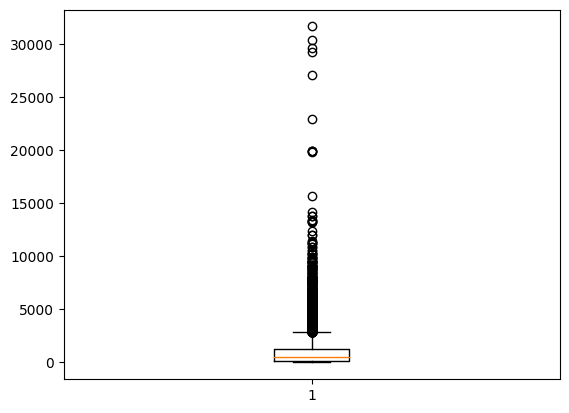

In [15]:
text_length = dataframe["reviewText"].apply(len)
print("Statistic of text length\n", text_length.describe())
# To visualize this, we use boxplot
plt.boxplot(text_length, vert=False)
plt.show()
